# Clustering

### Problem Statement

The data is related with direct marketing campaigns of a Portuguese banking institution. We need to cluster customers on the basis of attributes.

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [2]:
#Read data
bank = pd.read_csv('bankmarketing.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#Check columns in the data
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
# Importing Categorical Columns
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [5]:
# Converting age into categorical variable.
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust  = bank_cust.drop('age',axis = 1)

In [6]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


### Data Inspection

In [7]:
bank_cust.shape

(41188, 11)

In [8]:
bank_cust.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,9
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,30-40
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,16385


In [9]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
job            41188 non-null object
marital        41188 non-null object
education      41188 non-null object
default        41188 non-null object
housing        41188 non-null object
loan           41188 non-null object
contact        41188 non-null object
month          41188 non-null object
day_of_week    41188 non-null object
poutcome       41188 non-null object
age_bin        41188 non-null category
dtypes: category(1), object(10)
memory usage: 3.2+ MB


### Data Cleaning

In [10]:
# Checking Null values
bank_cust.isnull().sum()*100/bank_cust.shape[0]
# There are no NULL values in the dataset, hence it is clean.

job            0.0
marital        0.0
education      0.0
default        0.0
housing        0.0
loan           0.0
contact        0.0
month          0.0
day_of_week    0.0
poutcome       0.0
age_bin        0.0
dtype: float64

### Model Building

### K Modes

In [11]:
# First we will keep a copy of data
bank_cust_copy = bank_cust.copy()

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


In [ ]:
import sys
!{sys.executable} -m pip install kmodes

In [14]:
# Importing Libraries

from kmodes.kmodes import KModes
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


### Choosing K by comparing Cost against each K

In [15]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


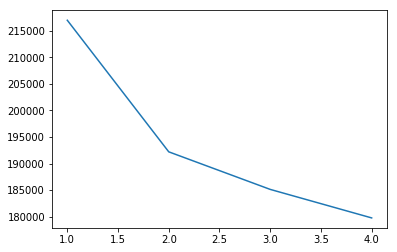

In [16]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

### Combining the predicted clusters with the original DF.

In [17]:
bank_cust1 = bank_cust_copy.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60,1
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60,1
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60,1


### K Means

In [18]:
from sklearn.cluster import KMeans

### Choosing K by comparing Cost against each K

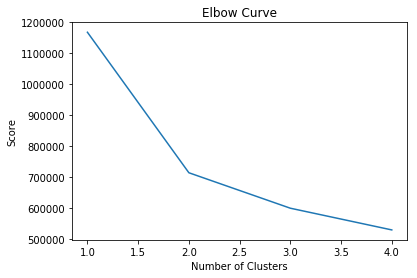

In [19]:
import pylab as pl
number_of_clusters = range(1,5)
kmeans = [KMeans(n_clusters=i,max_iter=1000,random_state=42) for i in number_of_clusters]
score = [-1*kmeans[i].fit(bank_cust).score(bank_cust) for i in range(len(kmeans))]
pl.plot((number_of_clusters),score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [20]:
km = KMeans(n_clusters=6,max_iter=1000,random_state=42)
fitClusters = km.fit_predict(bank_cust)

### Combining the predicted clusters with the original DF.

In [21]:
bank_cust1 = bank_cust_copy.reset_index()
clustersDf = pd.DataFrame(fitClusters)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60,5
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60,1
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40,1
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40,5
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60,1


### Hierarchical Agglomerative Clustering

In [22]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
fitClusters = ac.fit(bank_cust)

In [ ]:
bank_cust1 = bank_cust_copy.reset_index()
clustersDf = pd.DataFrame(fitClusters)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf.head()